# Credit Risk Estimation

The primary role of financial istitutions is to crate a channel by which founds move from entities with surplus into ones with deficit. Credit risk is the risk that arises when a borrower is not able to honor their debt.

* Exposure: This refers to a party that may possible default or suffer an adverse change in its ability to perform. 
* Likelihood: The likelihood that this party will default on its obligations. 
* Recovery rate: How much can be retrived if a default takes place.

Risk bucketing is to obtain homogenous groups or clusters so that we can better estimate the credit risk. Treating different risky borrowers equally may result in poor predictions because the model cannot capture entirely different characteristics of the data at once. 

In [1]:
import pandas as pd
credit = pd.read_csv('data/credit_data_risk.csv')
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [2]:
del credit['Unnamed: 0']

In [3]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['figure.figsize'] = (10,6)

In [5]:
numerical_credit = credit.select_dtypes(exclude='O')

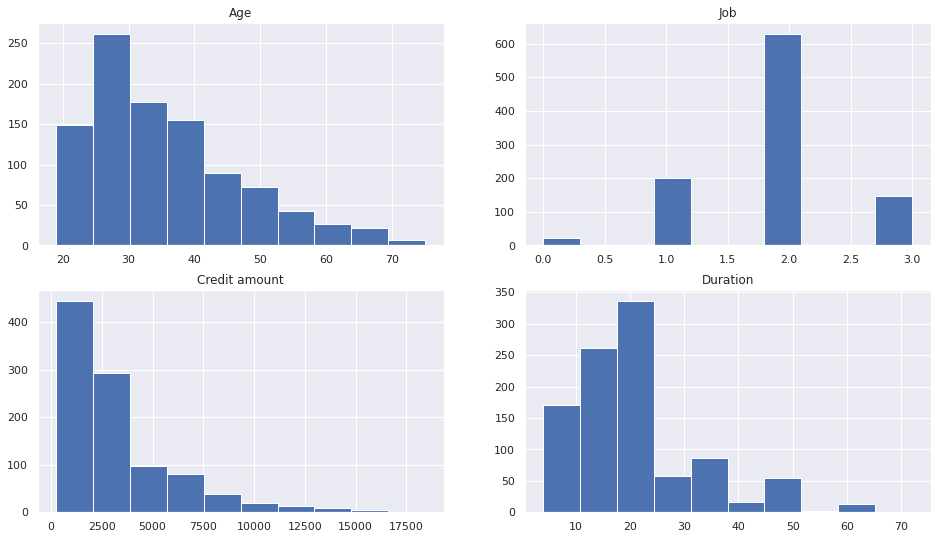

In [6]:
plt.figure(figsize=(16,9))
k=0
cols = numerical_credit.columns
for i, j in zip(range(len(cols)), cols):
    k+=1
    plt.subplot(2,2,k)
    plt.hist(numerical_credit.iloc[:,i])
    plt.title(j)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [8]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

In [9]:
distance = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)

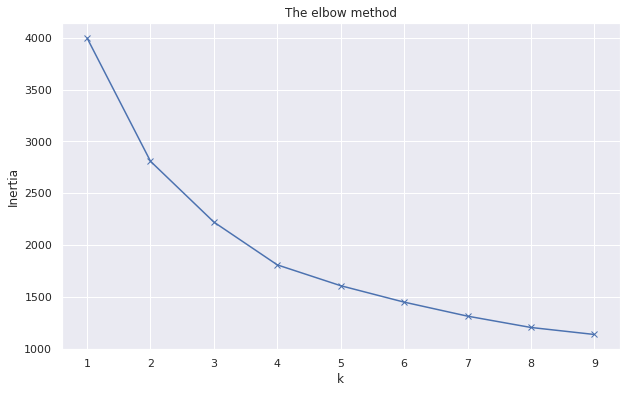

In [10]:
plt.plot(range(1,10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
pip

NameError: name 'SilhouetteVisualizer' is not defined

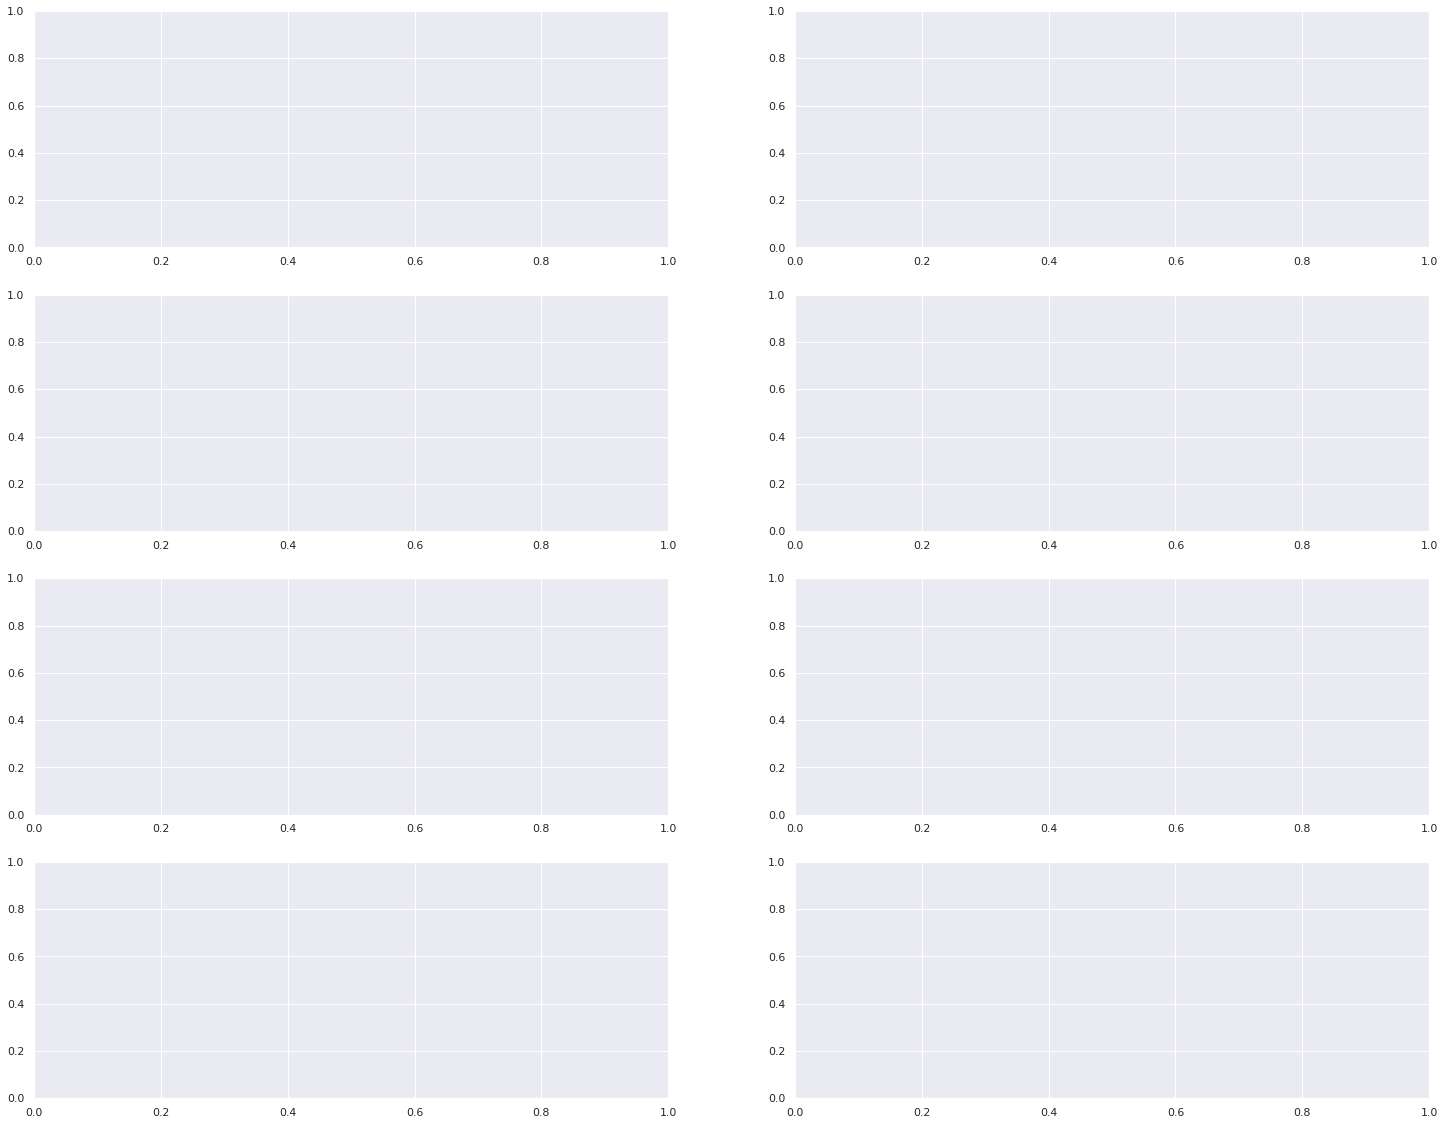

In [12]:
fig, ax = plt.subplots(4,2, figsize=(25,20))
for i in range(2,10):
    km = KMeans(n_clusters=i)
    q,r = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick',ax=ax[q-1][r])
    visualizer.fit(scaled_credit)
    ax[q -1][r].set_title('For Cluster_'+str(i))
    ax[q -1][r].set_xlabel('Silhouette Score')
    

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),
                             metric = 'calinski_harabasz',
                             timings=False)
visualizer.fit(scaled_credit)
visualizer.show()

Shows that the elbow occurs at the second cluster, indicating that stoppong at two clusters is the optimum decision. 

In [13]:
from gap_statistic.optimalK import OptimalK

ModuleNotFoundError: No module named 'gap_statistic'

In [14]:
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib')
n_clusters = optimalK(scaled_credit, cluster_array=np.arange(1,10))

NameError: name 'OptimalK' is not defined

In [15]:
gap_result = optimalK.gap_df
gap_result.head()

NameError: name 'optimalK' is not defined

In [16]:
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r',
linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap Value')
plt.show()

NameError: name 'gap_result' is not defined

In [17]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(scaled_credit)

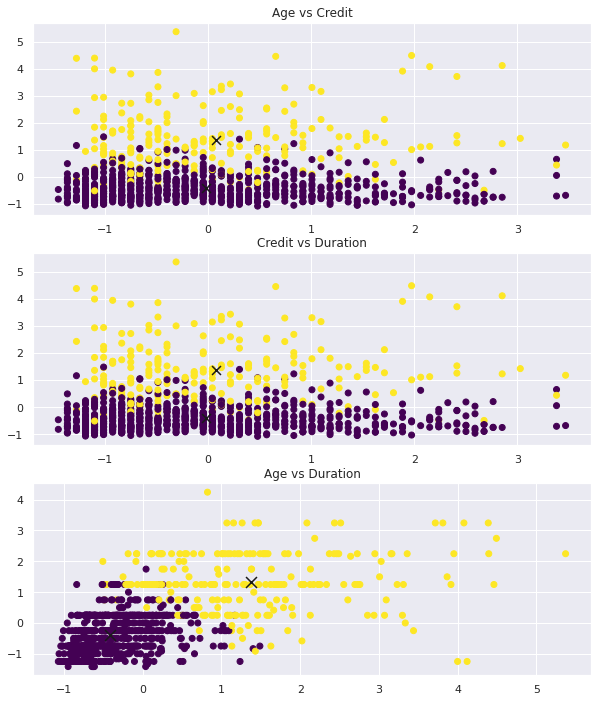

In [18]:
plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
kmeans.cluster_centers_[:, 2], s = 80,
marker= 'x', color = 'k')
plt.title('Age vs Credit')
plt.subplot(312)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
kmeans.cluster_centers_[:, 2], s = 80,
marker= 'x', color = 'k')
plt.title('Credit vs Duration')
plt.subplot(313)
plt.scatter(scaled_credit[:, 2], scaled_credit[:, 3],
c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2],
kmeans.cluster_centers_[:, 3], s = 120,
marker= 'x', color = 'k')
plt.title('Age vs Duration')
plt.show()

### Probability of Dafult Estimation With Logistic Regression

Logistic regression is a classification algorithm, widely applicable in finances industry.
Pr (Y = 1 | X = x).

In [19]:
#obtaining cluster numbers
clusters, counts = np.unique(kmeans.labels_, return_counts=True)

In [20]:
#deferianting the clusters and storing them in a dictionary
cluster_dict = {}
for i in range(len(clusters)):
    cluster_dict[i] = scaled_credit[np.where(kmeans.labels_==i)]

In [21]:
#creating clusters using K-means labels
credit['clusters'] = pd.DataFrame(kmeans.labels_)

In [22]:
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = credit['clusters']

In [23]:
df_scaled['Risk'] = credit['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit amount','Duration', 'Clusters', 'Risk']

In [24]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()

good    576
bad     195
Name: Risk, dtype: int64

In [25]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()

good    124
bad     105
Name: Risk, dtype: int64

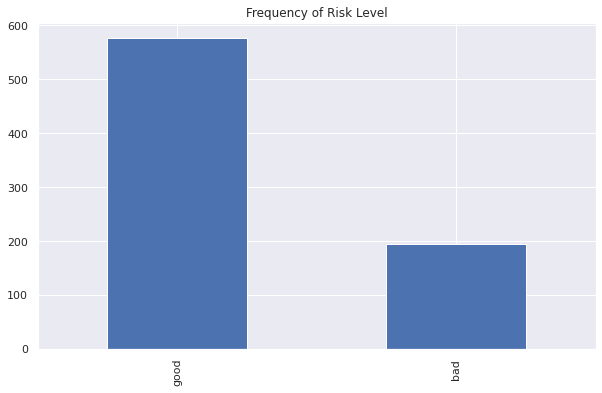

In [26]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts().plot(kind='bar',
figsize=(10, 6),
title="Frequency of Risk Level");

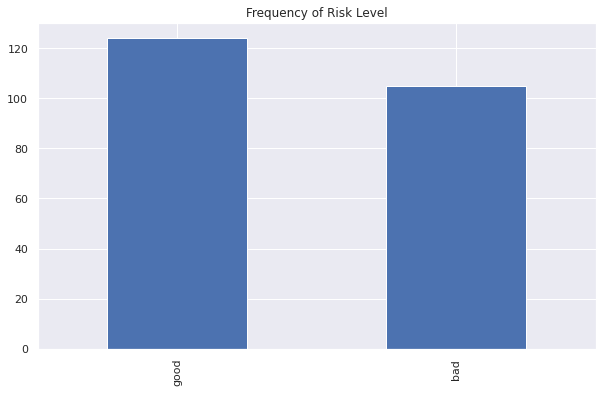

In [27]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts().plot(kind='bar',
figsize=(10, 6),
title="Frequency of Risk Level");

Converting imbalances data into balanced data will be our first step in predicting the probability.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#discretization of the variable
df_scaled['Risk'] = df_scaled['Risk'].replace({'good':1, 'bad':0})

In [30]:
#Creating data base on the first cluster and dropping last column from X_train
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:,['Risk', 'Clusters']]

In [31]:
# Creating data based on the second cluster and dropping last column from X_train
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42)

In [32]:
first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]

After these preparations, we are ready to move ahead and run the logistic regressin to predict the probability of default. According to the result, the age, credit amount, and job varaibles are positively related with the creditworthiness of customer, while a negative association emerges between the dependent and duration variables.

In [34]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN
import warnings 
warnings.filterwarnings('ignore')

In [35]:
X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters == 0]['Risk']
smote = SMOTEENN(random_state = 2)
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1.ravel())
logit = sm.Logit(y_train1, X_train1)
logit_fit1 = logit.fit()

logit_fit1.summary()

Optimization terminated successfully.
         Current function value: 0.430540
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  401
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 Aug 2022   Pseudo R-squ.:                  0.3709
Time:                        18:35:28   Log-Likelihood:                -172.65
converged:                       True   LL-Null:                       -274.44
Covariance Type:            nonrobust   LLR p-value:                 7.086e-44
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               1.7796      0.193      9.232      0.000       1.402       2.157
Job               0.6683      0.179      3.734      0.000       0.318       1.019
Credit amount     1.3338      0.318      4.192      0.000       0.710       1.957
Duration         -1.4768      0.265     -5.581      0.000      -1.995      -0.958
=================================================================================
"""

In [36]:
first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]

In [37]:
X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters == 0]['Risk']
pred_prob1 = logit_fit1.predict(X_test1)

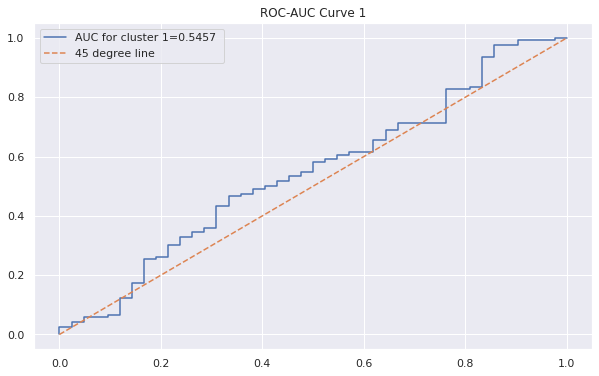

In [38]:
false_pos, true_pos, _ = roc_curve(y_test1.values, pred_prob1)
auc = roc_auc_score(y_test1, pred_prob1)
plt.plot(false_pos,true_pos, label="AUC for cluster 1={:.4f} "
.format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 1')
plt.show()

The ROC-AUC curve is a convinent tool in the presence of imbalanced data. The ROC-AUC suggest that the performance of the model is not very good, because it moves just above the 45-degre line.

In [39]:
X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters == 1]['Risk']
logit = sm.Logit(y_train2, X_train2)
logit_fit2 = logit.fit()
print(logit_fit2.summary())

Optimization terminated successfully.
         Current function value: 0.688167
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  193
Model:                          Logit   Df Residuals:                      189
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 Aug 2022   Pseudo R-squ.:                0.001590
Time:                        18:35:34   Log-Likelihood:                -132.82
converged:                       True   LL-Null:                       -133.03
Covariance Type:            nonrobust   LLR p-value:                    0.9354
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age              -0.0120      0.149     -0.081      0.936      -0.304       0.280
Job               0.

In [40]:
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters ==1]['Risk']
pred_prob2 = logit_fit2.predict(X_test2)

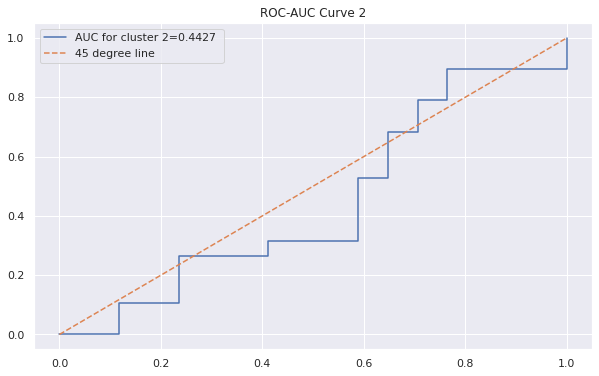

In [41]:
false_pos, true_pos,_ = roc_curve(y_test2.values, pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos,true_pos,label="AUC for cluster 2={:.4f} ".format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 2')
plt.show()

Given the test data, the result show in Figure is worse that the previos application, as can be confirmed by the AUC score of 0.4064. Considering this data, we are far from saying that logistic regression is doing a good job of modeling probability of default using the German credit risk dataset.

## Probability of Default Estimation with the Bayesian Model

In [43]:
import pymc3 as pm
import arviz as az

In [47]:
with pm.Model() as logistic_model1: 
    beta_age = pm.Normal('coeff_age', mu=0, sd=10)
    beta_job = pm.Normal('coeff_job', mu=0, sd=10)
    beta_credit = pm.Normal('coeff_credit_amount', mu=0, sd=10)
    beta_dur = pm.Normal('coeff_duration', mu=0, sd=10)
    p= pm.Deterministic('p', pm.math.sigmoid(beta_age * X_train1['Age'] + beta_job *
                                           X_train1['Job'] + beta_credit *
                                           X_train1['Credit amount'] + beta_dur *
                                           X_train1['Duration']))
    with logistic_model1:
        observed = pm.Bernoulli('risk', p, observed=y_train1)
        map_estimate = pm.find_MAP()

In [48]:
param_list = ['coeff_age', 'coeff_job','coeff_credit_amount', 'coeff_duration']
params = {}
for i in param_list:
    params[i] = [np.round(map_estimate[i], 6)]
    
    bayesian_params = pd.DataFrame.from_dict(params)
    print('The result of Bayesian estimation:\n {}'.format(bayesian_params))
    

The result of Bayesian estimation:
    coeff_age
0   1.610056
The result of Bayesian estimation:
    coeff_age  coeff_job
0   1.610056   0.505535
The result of Bayesian estimation:
    coeff_age  coeff_job  coeff_credit_amount
0   1.610056   0.505535             1.496773
The result of Bayesian estimation:
    coeff_age  coeff_job  coeff_credit_amount  coeff_duration
0   1.610056   0.505535             1.496773       -1.679486


In [51]:
with pm.Model() as logistic_model2:
    beta_age = pm.Normal('coeff_age', mu=0, sd=10)
    beta_job = pm.Normal('coeff_job', mu=0, sd=10)
    beta_credit = pm.Normal('coeff_credit_amount', mu=0, sd=10)
    beta_dur = pm.Normal('coeff_duration', mu=0, sd=10)
    p = pm.Deterministic('p', pm.math.sigmoid(beta_age *
    second_cluster_train['Age'] +
    beta_job * second_cluster_train['Job'] +
    beta_credit *
    second_cluster_train['Credit amount'] +
    beta_dur *
    second_cluster_train['Duration']))
    with logistic_model2:
        observed = pm.Bernoulli("risk", p,
        observed=y_train[y_train.Clusters == 1]
        ['Risk'])
        map_estimate = pm.find_MAP()

In [57]:
param_list = [ 'coeff_age', 'coeff_job','coeff_credit_amount', 'coeff_duration']

params = {}
for i in param_list:
    params[i] = [np.round(map_estimate[i], 6)]

bayesian_params = pd.DataFrame.from_dict(params)
print('The result of Bayesian estimation:\n {}'.format(bayesian_params))

The result of Bayesian estimation:
    coeff_age  coeff_job  coeff_credit_amount  coeff_duration
0   0.028747   0.152289            -0.104812        0.095585


In [58]:
import logging
logger = logging.getLogger('pymc3')
logger.setLevel(logging.ERROR)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


<Figure size 1440x2520 with 0 Axes>

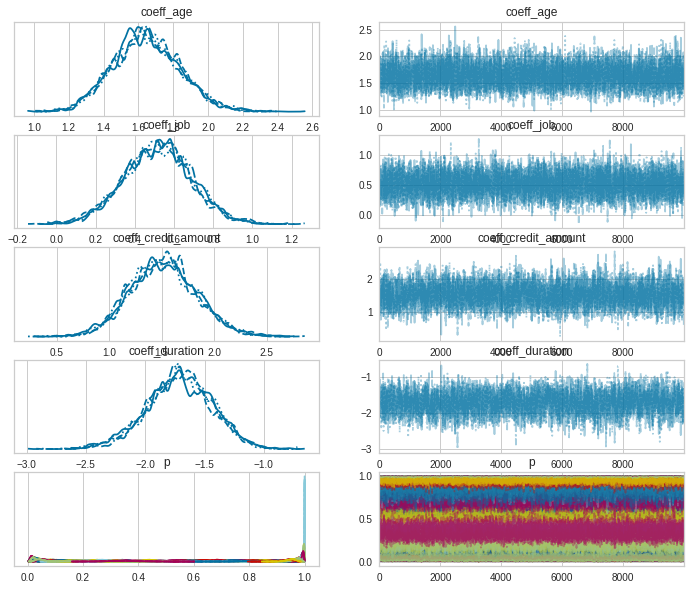

In [63]:
plt.figure(figsize=(20, 35))
with logistic_model1:
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step,progressbar = False)
az.plot_trace(trace)
plt.show()

In [64]:
with logistic_model1:
    display(az.summary(trace, round_to=6)[:4])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
coeff_age,1.645741,0.191945,1.295554,2.010246,0.002684,0.001905,5139.549146,6306.536927,1.000555
coeff_job,0.517920,0.172391,0.185354,0.834507,0.002218,0.001574,6033.106321,6574.303811,1.000912
coeff_credit_amount,1.515425,0.316198,0.948968,2.130796,0.006001,0.004280,2788.674116,4894.213709,1.001048
coeff_duration,-1.711685,0.276148,-2.240677,-1.202534,0.005482,0.003877,2546.184023,4269.602722,1.001023


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


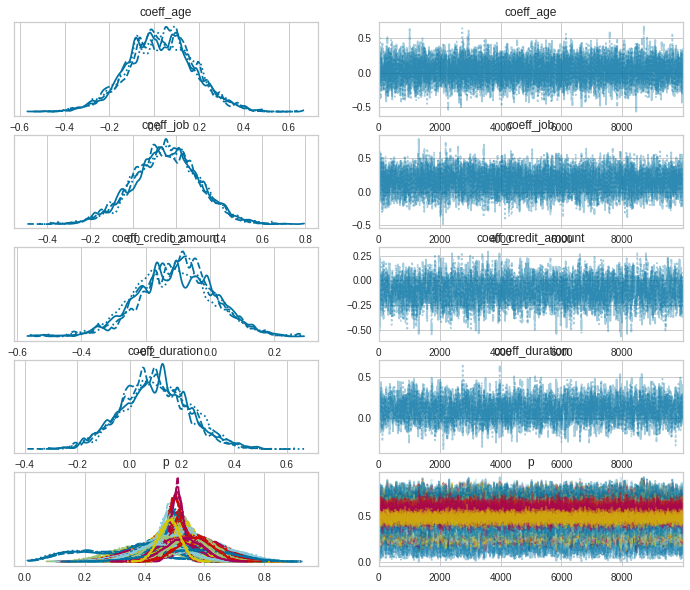

In [65]:
with logistic_model2:
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step,progressbar = False)
az.plot_trace(trace)
plt.show()

## Probability of Defaulr Estimation with Support Vector Machines

In [87]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import time

In [88]:
param_svc = {'gamma': [1e-6, 1e-2],
'C':[0.001,.09,1,5,10],
'kernel':('linear','rbf')}

In [94]:
svc = SVC(class_weight='balanced')
halve_SVC = HalvingRandomSearchCV(svc, param_svc,scoring = 'roc_auc', n_jobs=-1)
halve_SVC.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in SVC {} with {}'.format(halve_SVC.best_score_, halve_SVC.best_params_))

Best hyperparameters for first cluster in SVC 0.825676138618863 with {'kernel': 'rbf', 'gamma': 1e-06, 'C': 5}


In [95]:
y_pred_SVC1 = halve_SVC.predict(X_test1)
print('The ROC AUC score of SVC for first cluster is {:.4f}'.
format(roc_auc_score(y_test1, y_pred_SVC1)))

The ROC AUC score of SVC for first cluster is 0.5000


## Probability of default estimation with random forest

The random forest classifier is another model we can employ to model the probability of default.

In [101]:
from sklearn.ensemble import RandomForestClassifier


In [102]:
rfc = RandomForestClassifier(random_state=42)

In [103]:
param_rfc = {'n_estimators' : [100,300],
            'criterion':['gini', 'entropy'],
            'max_features': ['auto','sqrt','log2'],
            'max_depth' : [3,4,5,6],
            'min_samples_split':[5,10]}

In [104]:
halve_RF = HalvingRandomSearchCV(rfc, param_rfc,scoring = 'roc_auc', n_jobs=-1)
halve_RF.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in RF {} with {}'.format(halve_RF.best_score_, halve_RF.best_params_))

/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 571, in roc_auc_score
    return _average_binary_score(
  File "/home/hugo_arellano/a

/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 571, in roc_auc_score
    return _average_binary_score(
  File "/home/hugo_arellano/a

/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 571, in roc_auc_score
    return _average_binary_score(
  File "/home/hugo_arellano/a

/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 571, in roc_auc_score
    return _average_binary_score(
  File "/home/hugo_arellano/a

Best hyperparameters for first cluster in RF 0.9037836926708722 with {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}


In [106]:
y_pred_RF1 = halve_RF.predict(X_test1)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
format(roc_auc_score(y_test1, y_pred_RF1)))

The ROC AUC score of RF for first cluster is 0.5391


In [109]:
# the second cluster

halve_RF.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in RF {} with {}'.format(halve_RF.best_score_, halve_RF.best_params_))

/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 571, in roc_auc_score
    return _average_binary_score(
  File "/home/hugo_arellano/a

Best hyperparameters for second cluster in RF 0.6507265713302864 with {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'gini'}


In [110]:
y_pred_RF2 = halve_RF.predict(X_test2)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
format(roc_auc_score(y_test2, y_pred_RF2)))

The ROC AUC score of RF for first cluster is 0.6433


Random forest has a much better predictive performance in the second cluster, with
an AUC score of 0.5906. Given the predictive performance of random forest, we can
conclude that random forest does a better job of fitting the data. This is partly
because of the low-dimensional characteristics of the data, as random forest turns
out to be a good choice when data has low dimensionality and a large number of
observations.

## Probability of Default Estimation with Neural Network

In [111]:
from sklearn.neural_network import MLPClassifier

In [112]:
param_NN = {"hidden_layer_sizes": [(100, 50), (50, 50), (10, 100)],
            "solver": ["lbfgs", "sgd", "adam"],
            "learning_rate_init": [0.001, 0.05]}

In [113]:
MLP = MLPClassifier(random_state=42)

In [114]:
param_halve_NN = HalvingRandomSearchCV(MLP, param_NN,scoring = 'roc_auc')

In [115]:
param_halve_NN.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in NN are {}'.format(param_halve_NN.best_params_))

Best hyperparameters for first cluster in NN are {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (10, 100)}


In [116]:
y_pred_NN1 = param_halve_NN.predict(X_test1)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
format(roc_auc_score(y_test1, y_pred_NN1)))

The ROC AUC score of NN for first cluster is 0.5143


In [117]:
param_halve_NN.fit(X_train2, y_train2)
print('Best hyperparameters for first cluster in NN are {}'.
format(param_halve_NN.best_params_))

Best hyperparameters for first cluster in NN are {'solver': 'adam', 'learning_rate_init': 0.05, 'hidden_layer_sizes': (100, 50)}


In [118]:
y_pred_NN2 = param_halve_NN.predict(X_test2)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
format(roc_auc_score(y_test2, y_pred_NN2)))

The ROC AUC score of NN for first cluster is 0.6418


### Probability of Default Estimation with Deep Learning

Let's now take at the performance of a deep learning model using TensorFlow via KerasClassifier, which enables us to control for the hyperparameters.

In [42]:
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

In [43]:
def DL_risk(dropout_rate, verbose=0):
    model = keras.Sequential()
    model.add(Dense(128, kernel_initializer = 'normal',
                    activation = 'relu', input_dim=4))
    model.add(Dense(64, kernel_initializer='normal',
                   activation = 'relu'))
    model.add(Dense(8,kernel_initializer='normal',
                   activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop')
    return model

In [44]:
parameters = {'batch_size': [10,50,100],
             'epochs':[50,100,150],
             'dropout_rate':[0.2,0.4]}
model = KerasClassifier(build_fn = DL_risk)
gs = GridSearchCV(estimator = model,
                 param_grid = parameters, 
                 scoring = 'roc_auc')

In [45]:
gs.fit(X_train1, y_train1, verbose=0)
print('Best hyperparameters for first cluster in DL are {}'.
format(gs.best_params_))

2022-08-15 18:45:28.290120: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-15 18:45:28.290695: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-15 18:45:28.375554: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Best hyperparameters for first cluster in DL are {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 50}


In [47]:
model = KerasClassifier(build_fn = DL_risk,dropout_rate = gs.best_params_['dropout_rate'],
                        verbose = 0, batch_size = gs.best_params_['batch_size'], 
                        epochs = gs.best_params_['epochs'])

model.fit(X_train1, y_train1)

DL_predict1 = model.predict(X_test1)
DL_ROC_AUC = roc_auc_score(y_test1, pd.DataFrame(DL_predict1.flatten()))
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

DL_ROC_AUC is 0.5517


In [48]:
gs.fit(X_train2.values, y_train2.values, verbose=0)
print('Best parameters for second cluster in DL are {}'.format(gs.best_params_))

Best parameters for second cluster in DL are {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 150}


In [51]:
model = KerasClassifier(build_fn = DL_risk,
                       dropout_rate = gs.best_params_['dropout_rate'],
                       verbose = 0,
                       batch_size = gs.best_params_['batch_size'],
                       epochs = gs.best_params_['epochs'])
model.fit(X_train2, y_train2)
DL_predict2 = model.predict(X_test2)
DL_ROC_AUC = roc_auc_score(y_test2, DL_predict2.flatten())
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

DL_ROC_AUC is 0.5573
